In [1]:
!pip install mlxtend

In [2]:
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=gkenq&logNo=10188110816
# https://wikidocs.net/123595 

In [3]:
import numpy as np
import pandas as pd
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [4]:
dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]

In [5]:
##############################
##   dataset의 고유값 추출
##  파이썬의 extend로도 리스트 연결가능함.
################################
import numpy as np
tmp = []
for x in dataset:
    for j in x:
        tmp.append(j)
np.unique(tmp)

array(['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두'], dtype='<U3')

In [17]:
items = np.unique(tmp)
result=[]
for data in dataset:
    list_ = ['True' if x in data else 'False' for x in items]
    result.append(list_)
result
pd.DataFrame(result, columns=items)

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [18]:
te = TransactionEncoder()
te.fit(dataset)
te.columns_

['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']

In [19]:
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False,  True,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True,  True],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True, False,  True,  True,  True]])

In [20]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [22]:
frequent_itemsets = apriori(df,use_colnames=True)
print(frequent_itemsets)

apriori(df,min_support=0.1,use_colnames=True)

   support      itemsets
0     0.50          (사과)
1     1.00          (생수)
2     0.75          (치즈)
3     0.50          (호두)
4     0.50      (사과, 생수)
5     0.75      (생수, 치즈)
6     0.50      (호두, 생수)
7     0.50      (호두, 치즈)
8     0.50  (호두, 생수, 치즈)


,support,itemsets
0,0.25,(고등어)
1,0.50,(사과)
2,1.00,(생수)
3,0.25,(수박)
4,0.25,(옥수수)
5,0.75,(치즈)
6,0.50,(호두)
7,0.25,"(고등어, 생수)"
8,0.25,"(고등어, 치즈)"
9,0.25,"(호두, 고등어)"


In [24]:
## 특정갯수 이상의 item만 추출
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) 
frequent_itemsets[frequent_itemsets['length'] >=2] 

,support,itemsets,length
4,0.50,"(사과, 생수)",2
5,0.75,"(생수, 치즈)",2
6,0.50,"(호두, 생수)",2
7,0.50,"(호두, 치즈)",2
8,0.50,"(호두, 생수, 치즈)",3


In [25]:
# # 특정 아이템(치즈)이 포함된 것만 추출
frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: '치즈' in x)] 

,support,itemsets,length
2,0.75,(치즈),1
5,0.75,"(생수, 치즈)",2
7,0.50,"(호두, 치즈)",2
8,0.50,"(호두, 생수, 치즈)",3


In [26]:
from mlxtend.frequent_patterns import apriori,association_rules

# metric 에는 지지도(support), 신뢰도(confidence), 향상도(lift) 사용가능
# 값의 최소옵션은 min_threshold에 기입함.

rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
rules
# association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
1,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
2,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
3,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
4,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
5,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
6,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
7,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
8,"(호두, 생수)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
9,"(호두, 치즈)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf


In [27]:
# lift값이 가장 큰 값
rules[rules.antecedents == {'생수'}].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(생수),(사과),1.0,0.50,0.50,0.50,1.0,0.0,1.0
2,(생수),(치즈),1.0,0.75,0.75,0.75,1.0,0.0,1.0
5,(생수),(호두),1.0,0.50,0.50,0.50,1.0,0.0,1.0
12,(생수),"(호두, 치즈)",1.0,0.50,0.50,0.50,1.0,0.0,1.0


In [28]:
# 특정단어가 있는 자료 찾기,위에서 한 내용임
rules[rules.antecedents.apply(lambda x: '생수' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
2,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
5,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
8,"(호두, 생수)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
10,"(생수, 치즈)",(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
12,(생수),"(호두, 치즈)",1.00,0.50,0.50,0.500000,1.000000,0.000,1.0


In [29]:
!pip install networkx
!pip install matplotlib

In [30]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
1,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
2,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
3,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
4,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
5,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
6,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
7,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
8,"(호두, 생수)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
9,"(호두, 치즈)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf


In [31]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=49329f905407d1ca02fcdf4361906ef4a471f089843386f18bbc6cb651931ac2
  Stored in directory: c:\users\baekj\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [32]:
from apyori import apriori
result=(list(apriori(dataset, min_support=0.01)))
df=pd.DataFrame(result)
df[:5]

,items,support,ordered_statistics
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]"
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]"
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]"
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]"
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]"


In [34]:
# 글자길이
df['length']=df['items'].apply(lambda x: len(x))
df[:5]

,items,support,ordered_statistics,length
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]",1
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]",1
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]",1
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]",1
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]",1


In [35]:
# 필수는 아닌것 같음
df=df[(df['length']==2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)
df.head(10)

,items,support,ordered_statistics,length
15,"(생수, 치즈)",0.75,"[((), (생수, 치즈), 0.75, 1.0), ((생수), (치즈), 0.75,...",2
10,"(사과, 생수)",0.50,"[((), (사과, 생수), 0.5, 1.0), ((사과), (생수), 1.0, 1...",2
16,"(호두, 생수)",0.50,"[((), (호두, 생수), 0.5, 1.0), ((생수), (호두), 0.5, 1...",2
19,"(호두, 치즈)",0.50,"[((), (호두, 치즈), 0.5, 1.0), ((치즈), (호두), 0.6666...",2
7,"(고등어, 생수)",0.25,"[((), (고등어, 생수), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(고등어, 치즈)",0.25,"[((), (고등어, 치즈), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(호두, 고등어)",0.25,"[((), (호두, 고등어), 0.25, 1.0), ((고등어), (호두), 1.0...",2
11,"(수박, 사과)",0.25,"[((), (수박, 사과), 0.25, 1.0), ((사과), (수박), 0.5, ...",2
12,"(사과, 치즈)",0.25,"[((), (사과, 치즈), 0.25, 1.0), ((사과), (치즈), 0.5, ...",2
13,"(수박, 생수)",0.25,"[((), (수박, 생수), 0.25, 1.0), ((생수), (수박), 0.25,...",2


In [36]:
!pip install networkx

In [39]:
r=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.0)
tmp=pd.DataFrame(r)
display(tmp[:5])

tmp['length']=tmp['antecedents'].apply(lambda x: len(x))
tmp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(사과),(생수),0.50,1.00,0.50,1.00,1.0,0.0,inf
1,(생수),(사과),1.00,0.50,0.50,0.50,1.0,0.0,1.0
2,(생수),(치즈),1.00,0.75,0.75,0.75,1.0,0.0,1.0
3,(치즈),(생수),0.75,1.00,0.75,1.00,1.0,0.0,inf
4,(호두),(생수),0.50,1.00,0.50,1.00,1.0,0.0,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,1
1,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,1
2,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0,1
3,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf,1
4,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,1
5,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0,1
6,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,1
7,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5,1
8,"(호두, 생수)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf,2
9,"(호두, 치즈)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf,2


In [40]:
import networkx as nx
G=nx.Graph()
ar=(df['items']); G.add_edges_from(ar)
ar

15     (생수, 치즈)
10     (사과, 생수)
16     (호두, 생수)
19     (호두, 치즈)
7     (고등어, 생수)
8     (고등어, 치즈)
9     (호두, 고등어)
11     (수박, 사과)
12     (사과, 치즈)
13     (수박, 생수)
14    (옥수수, 생수)
17    (옥수수, 치즈)
18    (호두, 옥수수)
Name: items, dtype: object

In [41]:
G1=nx.Graph()
ar1=tmp['antecedents']; G1.add_edges_from(ar)
ar1

0         (사과)
1         (생수)
2         (생수)
3         (치즈)
4         (호두)
5         (생수)
6         (호두)
7         (치즈)
8     (호두, 생수)
9     (호두, 치즈)
10    (생수, 치즈)
11        (호두)
12        (생수)
13        (치즈)
Name: antecedents, dtype: object

In [42]:
pr=nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
nsize

array([2000.        , 1450.1405505 ,  506.37981884,  933.20920045,
        429.68501826,    0.        ,  429.68501826])

In [43]:
pos=nx.planar_layout(G1)
pos

{'생수': array([-1.        , -0.38461538]),
 '치즈': array([ 0.79487179, -0.38461538]),
 '사과': array([0.07692308, 0.33333333]),
 '호두': array([ 0.07692308, -0.02564103]),
 '고등어': array([ 0.07692308, -0.20512821]),
 '수박': array([-0.1025641 ,  0.51282051]),
 '옥수수': array([0.07692308, 0.15384615])}

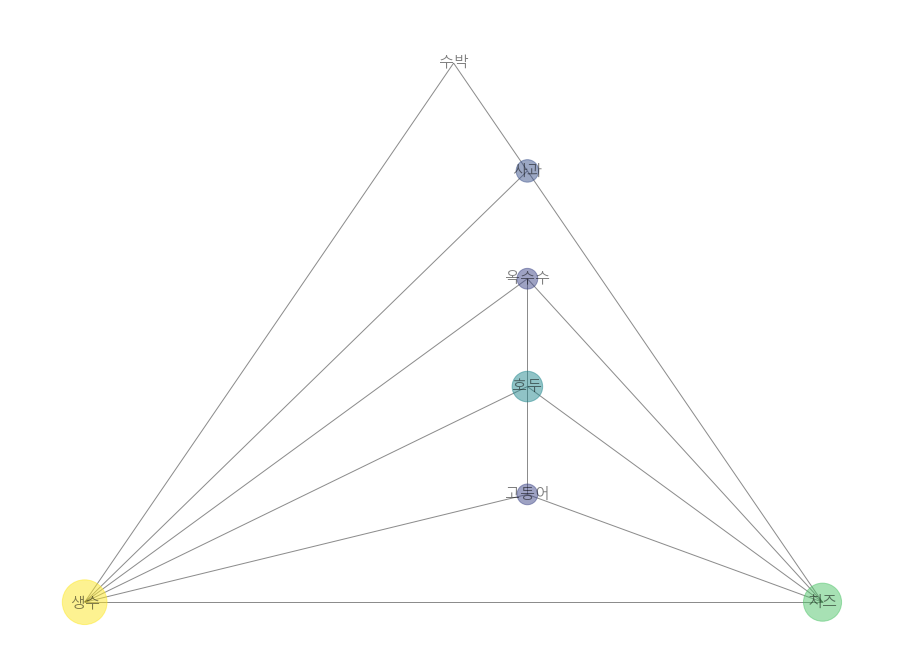

In [44]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "C:/windows/fonts/malgun.ttf"
plt.figure(figsize=(16,12)); plt.axis('off')
fname = fm.FontProperties(fname=font_path).get_name()


#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G, pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)